# Voronoi Tuto

Credit source : https://www.youtube.com/watch?v=BUKsBH9oQKg  
Visit his Github : https://github.com/mckayjohns

In [1]:
import pandas as pd
import numpy as np
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline
#import 

In [2]:
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

In [3]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


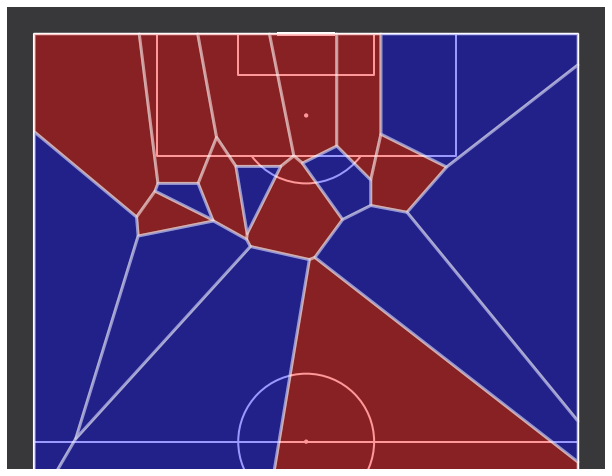

In [4]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = VerticalPitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=True)

pitch.draw(ax=ax)


x= df.x
y= df.y

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

In [5]:
team2

array([array([[ 90.25409836,  15.2704918 ],
              [ 60.46511628,   6.10465116],
              [ 50.        ,   0.        ],
              [105.58333333,   0.        ],
              [ 93.05223881,  15.03731343]]),
       array([[92.625     , 26.25      ],
              [98.        , 24.1       ],
              [98.        , 18.1875    ],
              [96.86842105, 17.76315789]]),
       array([[100.5       ,  29.66666667],
              [ 90.625     ,  31.3125    ],
              [100.5       ,  36.25      ]]),
       array([[ 92.68421053,  45.36842105],
              [100.97368421,  39.44736842],
              [103.5       ,  44.5       ],
              [ 98.5       ,  49.5       ],
              [ 94.75      ,  49.5       ]]),
       array([[105.25      ,  51.        ],
              [120.        ,  51.        ],
              [120.        ,  80.        ],
              [115.44444444,  80.        ],
              [100.41304348,  60.67391304]]),
       array([[ 93.74832215,  

### Compute voronoi area

In [8]:
#shoelace formula
def polygonArea(X, Y, n):
 
    # Initialize area
    area = 0.0
 
    # Calculate value of shoelace formula
    j = n - 1
    for i in range(0,n):
        area += (X[j] + X[i]) * (Y[j] - Y[i])
        j = i   # j is previous vertex to i
    
 
    # Return absolute value
    return int(abs(area / 2.0))

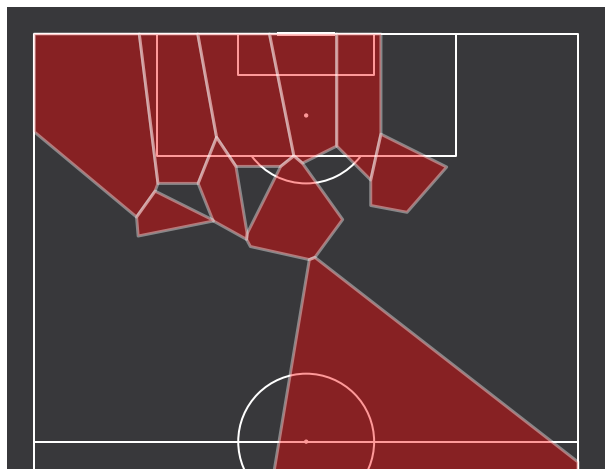

In [9]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = VerticalPitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=True)

pitch.draw(ax=ax)


x= df.x
y= df.y

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
#t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

In [10]:
team1

array([array([[ 93.05223881,  15.03731343],
              [105.58333333,   0.        ],
              [120.        ,   0.        ],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 96.86842105,  17.76315789]]),
       array([[120.        ,  24.04545455],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 98.        ,  24.1       ],
              [104.78125   ,  26.8125    ]]),
       array([[100.5       ,  36.25      ],
              [100.5       ,  29.66666667],
              [104.78125   ,  26.8125    ],
              [120.        ,  24.04545455],
              [120.        ,  34.6       ],
              [102.05172414,  38.18965517]]),
       array([[120.        ,  34.6       ],
              [120.        ,  44.5       ],
              [103.5       ,  44.5       ],
              [100.97368421,  39.44736842],
              [102.05172414,  38.18965517]]), array([[103.5 ,  44.5 ],

In [14]:
team1[0]

array([[ 93.05223881,  15.03731343],
       [105.58333333,   0.        ],
       [120.        ,   0.        ],
       [120.        ,  15.4375    ],
       [ 98.        ,  18.1875    ],
       [ 96.86842105,  17.76315789]])

In [18]:
xs = []
ys = []
for i in team1[0]:
    xs.append(i[0])
    ys.append(i[1])


In [19]:
xs

[93.05223880597015, 105.58333333333333, 120.0, 120.0, 98.0, 96.86842105263158]

In [20]:
ys

[15.03731343283582, 0.0, 0.0, 15.4375, 18.1875, 17.763157894736842]

In [24]:
n = len(xs)

In [26]:
polygonArea(xs, ys,n)

358